In [1]:
import numpy as np

from sklearn.base import BaseEstimator

from sklearn.utils.testing import assert_array_equal
from sklearn.utils.testing import assert_array_almost_equal
from sklearn.utils.testing import assert_equal
from sklearn.utils.testing import assert_raises
from sklearn.utils.testing import assert_greater
from sklearn.utils.testing import assert_less
from sklearn.utils.testing import assert_true
from sklearn.utils.testing import assert_false
from sklearn.utils.testing import assert_warns
from sklearn.utils.testing import assert_warns_message

from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR, LinearSVC
from sklearn.naive_bayes import GaussianNB


from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston, load_iris, make_hastie_10_2
from sklearn.utils import check_random_state

from scipy.sparse import csc_matrix, csr_matrix
from sklearn.model_selection import train_test_split
import csv 
import pandas
import time
import statistics 

start = time.time()
rng = check_random_state(0)

#Loading the data
header_reader = csv.reader(open("./Matlab_Files/joined_shots_2013.csv",'r'),delimiter = ',')
headers = set(next(header_reader))
print (headers)



{'', 'MINUTES_REMAINING', 'SHOT_ZONE_RANGE', 'LOCATION', 'LOC_X', 'SHOT_ZONE_AREA', 'EVENT_TYPE', 'PLAYER_ID', 'LOC_Y', 'GRID_TYPE', 'SHOT_ZONE_BASIC', 'SECONDS_REMAINING', 'PTS', 'GAME_ID', 'TEAM_ID', 'ACTION_TYPE', 'SHOT_DIST', 'FINAL_MARGIN', 'W', 'MATCHUP', 'CLOSE_DEF_DIST', 'GAME_EVENT_ID', 'PTS_TYPE', 'SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG', 'PERIOD', 'SHOT_NUMBER', 'SHOT_CLOCK', 'CLOSEST_DEFENDER', 'DRIBBLES', 'SHOT_TYPE', 'SHOT_DISTANCE', 'GAME_CLOCK', 'FGM', 'SHOT_RESULT', 'CLOSEST_DEFENDER_PLAYER_ID', 'TOUCH_TIME', 'PLAYER_NAME'}


In [42]:
#main_reader = csv.reader(open("./Matlab_Files/joined_shots_updated2013.csv",'r'),delimiter = ',')
dataframe = pandas.read_csv("./Matlab_Files/joined_shots_updated2013.csv",delimiter = ',',header =None)
array = dataframe.values

column_len = len(dataframe.columns)
columns = dataframe.columns

X = array[0:200961,0:30]
Y = array[0:200961,31]


# Check classification for various parameter settings.
rng = check_random_state(0)
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=rng)

grid = ParameterGrid({"n_estimators":range(1,151),
                      #"max_samples": [0.5, 1.0],
                      "max_samples": [1.0],
                      #"max_features": [1, 6, 16, 30],
                      "max_features": [6],
                      "bootstrap": [True],
                      "bootstrap_features": [False]
                      })
k = 1 
result = []
standardev = []
result2 = []
##,KNeighborsClassifier(),SVC(),LinearSVC(),GaussianNB()
for base_estimator in [DecisionTreeClassifier()]:
   
    for params in grid:
            predicted_labels = BaggingClassifier(base_estimator=base_estimator,random_state=rng,
                                                 **params).fit(X_train, y_train).predict(X_test)
            
            
            count=0
            for i in range(len(y_test)):
                if predicted_labels[i]==y_test[i]:
                    count=count+1

            brk = count/(len(y_test)) 
    
            
            result2.append(brk) 
            
            print(result2)
            print(k)
            if len(result2) > 10:
                window = result2[k-10:k]
                #print(window)
                temp = statistics.stdev(window)
                standardev.append(temp)
                
            if (len(result2) < 11) & (len(result2) !=1):
                temp = statistics.stdev(result2)
                standardev.append(temp)    
                #print("#Std: %f, Estimator: %d, Max Sample: %f, Max Features: %d, Bootstrap: %s, Bootstrap Features: %s, CCR: %f" %(temp,params["n_estimators"],params["max_samples"],params["max_features"],params["bootstrap"],params["bootstrap_features"],brk))

            k = k + 1
    

#end = time.time()
#print("Elapsed time is", (end - start))

[0.5236758822475668]
1
[0.5236758822475668, 0.5538703449374017]
2
[0.5236758822475668, 0.5538703449374017, 0.5716446726776935]
3
[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533]
4
[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533, 0.5861149260564081]
5
[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533, 0.5861149260564081, 0.568440118628212]
6
[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533, 0.5861149260564081, 0.568440118628212, 0.584542505125296]
7
[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533, 0.5861149260564081, 0.568440118628212, 0.584542505125296, 0.5933401007145559]
8
[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533, 0.5861149260564081, 0.568440118628212, 0.584542505125296, 0.5933401007145559, 0.5843036563762664]
9
[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533,

[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533, 0.5861149260564081, 0.568440118628212, 0.584542505125296, 0.5933401007145559, 0.5843036563762664, 0.5830098923190223, 0.6125475209490256, 0.5936983738381003, 0.5997890169383571, 0.5913496944726419, 0.6036703091100893, 0.6002866184988356, 0.5976990903843474, 0.6067952469098943, 0.600485659123027, 0.6099002806472801, 0.6153938018749627, 0.6162496765589857, 0.6042077187954061, 0.6160307318723751, 0.6125276168866065, 0.6119304950140324, 0.6147767759399694, 0.6112139487669433, 0.6037897334846042, 0.6193547102963715]
30
[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533, 0.5861149260564081, 0.568440118628212, 0.584542505125296, 0.5933401007145559, 0.5843036563762664, 0.5830098923190223, 0.6125475209490256, 0.5936983738381003, 0.5997890169383571, 0.5913496944726419, 0.6036703091100893, 0.6002866184988356, 0.5976990903843474, 0.6067952469098943, 0.600485659123027, 0.6099002806472801, 0

[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533, 0.5861149260564081, 0.568440118628212, 0.584542505125296, 0.5933401007145559, 0.5843036563762664, 0.5830098923190223, 0.6125475209490256, 0.5936983738381003, 0.5997890169383571, 0.5913496944726419, 0.6036703091100893, 0.6002866184988356, 0.5976990903843474, 0.6067952469098943, 0.600485659123027, 0.6099002806472801, 0.6153938018749627, 0.6162496765589857, 0.6042077187954061, 0.6160307318723751, 0.6125276168866065, 0.6119304950140324, 0.6147767759399694, 0.6112139487669433, 0.6037897334846042, 0.6193547102963715, 0.6250870802730837, 0.628550387134014, 0.6233554268426186, 0.6195139427957246, 0.6216038693497343, 0.6254453533966282, 0.6249079437113115, 0.6249477518361498, 0.6246093827750244, 0.6284309627594992, 0.6296252065046476, 0.6246093827750244]
42
[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533, 0.5861149260564081, 0.568440118628212, 0.584542505125296, 0.5933401007145559, 0

[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533, 0.5861149260564081, 0.568440118628212, 0.584542505125296, 0.5933401007145559, 0.5843036563762664, 0.5830098923190223, 0.6125475209490256, 0.5936983738381003, 0.5997890169383571, 0.5913496944726419, 0.6036703091100893, 0.6002866184988356, 0.5976990903843474, 0.6067952469098943, 0.600485659123027, 0.6099002806472801, 0.6153938018749627, 0.6162496765589857, 0.6042077187954061, 0.6160307318723751, 0.6125276168866065, 0.6119304950140324, 0.6147767759399694, 0.6112139487669433, 0.6037897334846042, 0.6193547102963715, 0.6250870802730837, 0.628550387134014, 0.6233554268426186, 0.6195139427957246, 0.6216038693497343, 0.6254453533966282, 0.6249079437113115, 0.6249477518361498, 0.6246093827750244, 0.6284309627594992, 0.6296252065046476, 0.6246093827750244, 0.6142791743794909, 0.6292470293186839, 0.6256842021456579, 0.6260623793316216, 0.6268585418283872, 0.629545590254971, 0.6314961883720467, 0.6277343205748294, 0.62

[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533, 0.5861149260564081, 0.568440118628212, 0.584542505125296, 0.5933401007145559, 0.5843036563762664, 0.5830098923190223, 0.6125475209490256, 0.5936983738381003, 0.5997890169383571, 0.5913496944726419, 0.6036703091100893, 0.6002866184988356, 0.5976990903843474, 0.6067952469098943, 0.600485659123027, 0.6099002806472801, 0.6153938018749627, 0.6162496765589857, 0.6042077187954061, 0.6160307318723751, 0.6125276168866065, 0.6119304950140324, 0.6147767759399694, 0.6112139487669433, 0.6037897334846042, 0.6193547102963715, 0.6250870802730837, 0.628550387134014, 0.6233554268426186, 0.6195139427957246, 0.6216038693497343, 0.6254453533966282, 0.6249079437113115, 0.6249477518361498, 0.6246093827750244, 0.6284309627594992, 0.6296252065046476, 0.6246093827750244, 0.6142791743794909, 0.6292470293186839, 0.6256842021456579, 0.6260623793316216, 0.6268585418283872, 0.629545590254971, 0.6314961883720467, 0.6277343205748294, 0.62

[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533, 0.5861149260564081, 0.568440118628212, 0.584542505125296, 0.5933401007145559, 0.5843036563762664, 0.5830098923190223, 0.6125475209490256, 0.5936983738381003, 0.5997890169383571, 0.5913496944726419, 0.6036703091100893, 0.6002866184988356, 0.5976990903843474, 0.6067952469098943, 0.600485659123027, 0.6099002806472801, 0.6153938018749627, 0.6162496765589857, 0.6042077187954061, 0.6160307318723751, 0.6125276168866065, 0.6119304950140324, 0.6147767759399694, 0.6112139487669433, 0.6037897334846042, 0.6193547102963715, 0.6250870802730837, 0.628550387134014, 0.6233554268426186, 0.6195139427957246, 0.6216038693497343, 0.6254453533966282, 0.6249079437113115, 0.6249477518361498, 0.6246093827750244, 0.6284309627594992, 0.6296252065046476, 0.6246093827750244, 0.6142791743794909, 0.6292470293186839, 0.6256842021456579, 0.6260623793316216, 0.6268585418283872, 0.629545590254971, 0.6314961883720467, 0.6277343205748294, 0.62

[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533, 0.5861149260564081, 0.568440118628212, 0.584542505125296, 0.5933401007145559, 0.5843036563762664, 0.5830098923190223, 0.6125475209490256, 0.5936983738381003, 0.5997890169383571, 0.5913496944726419, 0.6036703091100893, 0.6002866184988356, 0.5976990903843474, 0.6067952469098943, 0.600485659123027, 0.6099002806472801, 0.6153938018749627, 0.6162496765589857, 0.6042077187954061, 0.6160307318723751, 0.6125276168866065, 0.6119304950140324, 0.6147767759399694, 0.6112139487669433, 0.6037897334846042, 0.6193547102963715, 0.6250870802730837, 0.628550387134014, 0.6233554268426186, 0.6195139427957246, 0.6216038693497343, 0.6254453533966282, 0.6249079437113115, 0.6249477518361498, 0.6246093827750244, 0.6284309627594992, 0.6296252065046476, 0.6246093827750244, 0.6142791743794909, 0.6292470293186839, 0.6256842021456579, 0.6260623793316216, 0.6268585418283872, 0.629545590254971, 0.6314961883720467, 0.6277343205748294, 0.62

[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533, 0.5861149260564081, 0.568440118628212, 0.584542505125296, 0.5933401007145559, 0.5843036563762664, 0.5830098923190223, 0.6125475209490256, 0.5936983738381003, 0.5997890169383571, 0.5913496944726419, 0.6036703091100893, 0.6002866184988356, 0.5976990903843474, 0.6067952469098943, 0.600485659123027, 0.6099002806472801, 0.6153938018749627, 0.6162496765589857, 0.6042077187954061, 0.6160307318723751, 0.6125276168866065, 0.6119304950140324, 0.6147767759399694, 0.6112139487669433, 0.6037897334846042, 0.6193547102963715, 0.6250870802730837, 0.628550387134014, 0.6233554268426186, 0.6195139427957246, 0.6216038693497343, 0.6254453533966282, 0.6249079437113115, 0.6249477518361498, 0.6246093827750244, 0.6284309627594992, 0.6296252065046476, 0.6246093827750244, 0.6142791743794909, 0.6292470293186839, 0.6256842021456579, 0.6260623793316216, 0.6268585418283872, 0.629545590254971, 0.6314961883720467, 0.6277343205748294, 0.62

[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533, 0.5861149260564081, 0.568440118628212, 0.584542505125296, 0.5933401007145559, 0.5843036563762664, 0.5830098923190223, 0.6125475209490256, 0.5936983738381003, 0.5997890169383571, 0.5913496944726419, 0.6036703091100893, 0.6002866184988356, 0.5976990903843474, 0.6067952469098943, 0.600485659123027, 0.6099002806472801, 0.6153938018749627, 0.6162496765589857, 0.6042077187954061, 0.6160307318723751, 0.6125276168866065, 0.6119304950140324, 0.6147767759399694, 0.6112139487669433, 0.6037897334846042, 0.6193547102963715, 0.6250870802730837, 0.628550387134014, 0.6233554268426186, 0.6195139427957246, 0.6216038693497343, 0.6254453533966282, 0.6249079437113115, 0.6249477518361498, 0.6246093827750244, 0.6284309627594992, 0.6296252065046476, 0.6246093827750244, 0.6142791743794909, 0.6292470293186839, 0.6256842021456579, 0.6260623793316216, 0.6268585418283872, 0.629545590254971, 0.6314961883720467, 0.6277343205748294, 0.62

[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533, 0.5861149260564081, 0.568440118628212, 0.584542505125296, 0.5933401007145559, 0.5843036563762664, 0.5830098923190223, 0.6125475209490256, 0.5936983738381003, 0.5997890169383571, 0.5913496944726419, 0.6036703091100893, 0.6002866184988356, 0.5976990903843474, 0.6067952469098943, 0.600485659123027, 0.6099002806472801, 0.6153938018749627, 0.6162496765589857, 0.6042077187954061, 0.6160307318723751, 0.6125276168866065, 0.6119304950140324, 0.6147767759399694, 0.6112139487669433, 0.6037897334846042, 0.6193547102963715, 0.6250870802730837, 0.628550387134014, 0.6233554268426186, 0.6195139427957246, 0.6216038693497343, 0.6254453533966282, 0.6249079437113115, 0.6249477518361498, 0.6246093827750244, 0.6284309627594992, 0.6296252065046476, 0.6246093827750244, 0.6142791743794909, 0.6292470293186839, 0.6256842021456579, 0.6260623793316216, 0.6268585418283872, 0.629545590254971, 0.6314961883720467, 0.6277343205748294, 0.62

[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533, 0.5861149260564081, 0.568440118628212, 0.584542505125296, 0.5933401007145559, 0.5843036563762664, 0.5830098923190223, 0.6125475209490256, 0.5936983738381003, 0.5997890169383571, 0.5913496944726419, 0.6036703091100893, 0.6002866184988356, 0.5976990903843474, 0.6067952469098943, 0.600485659123027, 0.6099002806472801, 0.6153938018749627, 0.6162496765589857, 0.6042077187954061, 0.6160307318723751, 0.6125276168866065, 0.6119304950140324, 0.6147767759399694, 0.6112139487669433, 0.6037897334846042, 0.6193547102963715, 0.6250870802730837, 0.628550387134014, 0.6233554268426186, 0.6195139427957246, 0.6216038693497343, 0.6254453533966282, 0.6249079437113115, 0.6249477518361498, 0.6246093827750244, 0.6284309627594992, 0.6296252065046476, 0.6246093827750244, 0.6142791743794909, 0.6292470293186839, 0.6256842021456579, 0.6260623793316216, 0.6268585418283872, 0.629545590254971, 0.6314961883720467, 0.6277343205748294, 0.62

[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533, 0.5861149260564081, 0.568440118628212, 0.584542505125296, 0.5933401007145559, 0.5843036563762664, 0.5830098923190223, 0.6125475209490256, 0.5936983738381003, 0.5997890169383571, 0.5913496944726419, 0.6036703091100893, 0.6002866184988356, 0.5976990903843474, 0.6067952469098943, 0.600485659123027, 0.6099002806472801, 0.6153938018749627, 0.6162496765589857, 0.6042077187954061, 0.6160307318723751, 0.6125276168866065, 0.6119304950140324, 0.6147767759399694, 0.6112139487669433, 0.6037897334846042, 0.6193547102963715, 0.6250870802730837, 0.628550387134014, 0.6233554268426186, 0.6195139427957246, 0.6216038693497343, 0.6254453533966282, 0.6249079437113115, 0.6249477518361498, 0.6246093827750244, 0.6284309627594992, 0.6296252065046476, 0.6246093827750244, 0.6142791743794909, 0.6292470293186839, 0.6256842021456579, 0.6260623793316216, 0.6268585418283872, 0.629545590254971, 0.6314961883720467, 0.6277343205748294, 0.62

[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533, 0.5861149260564081, 0.568440118628212, 0.584542505125296, 0.5933401007145559, 0.5843036563762664, 0.5830098923190223, 0.6125475209490256, 0.5936983738381003, 0.5997890169383571, 0.5913496944726419, 0.6036703091100893, 0.6002866184988356, 0.5976990903843474, 0.6067952469098943, 0.600485659123027, 0.6099002806472801, 0.6153938018749627, 0.6162496765589857, 0.6042077187954061, 0.6160307318723751, 0.6125276168866065, 0.6119304950140324, 0.6147767759399694, 0.6112139487669433, 0.6037897334846042, 0.6193547102963715, 0.6250870802730837, 0.628550387134014, 0.6233554268426186, 0.6195139427957246, 0.6216038693497343, 0.6254453533966282, 0.6249079437113115, 0.6249477518361498, 0.6246093827750244, 0.6284309627594992, 0.6296252065046476, 0.6246093827750244, 0.6142791743794909, 0.6292470293186839, 0.6256842021456579, 0.6260623793316216, 0.6268585418283872, 0.629545590254971, 0.6314961883720467, 0.6277343205748294, 0.62

[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533, 0.5861149260564081, 0.568440118628212, 0.584542505125296, 0.5933401007145559, 0.5843036563762664, 0.5830098923190223, 0.6125475209490256, 0.5936983738381003, 0.5997890169383571, 0.5913496944726419, 0.6036703091100893, 0.6002866184988356, 0.5976990903843474, 0.6067952469098943, 0.600485659123027, 0.6099002806472801, 0.6153938018749627, 0.6162496765589857, 0.6042077187954061, 0.6160307318723751, 0.6125276168866065, 0.6119304950140324, 0.6147767759399694, 0.6112139487669433, 0.6037897334846042, 0.6193547102963715, 0.6250870802730837, 0.628550387134014, 0.6233554268426186, 0.6195139427957246, 0.6216038693497343, 0.6254453533966282, 0.6249079437113115, 0.6249477518361498, 0.6246093827750244, 0.6284309627594992, 0.6296252065046476, 0.6246093827750244, 0.6142791743794909, 0.6292470293186839, 0.6256842021456579, 0.6260623793316216, 0.6268585418283872, 0.629545590254971, 0.6314961883720467, 0.6277343205748294, 0.62

[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533, 0.5861149260564081, 0.568440118628212, 0.584542505125296, 0.5933401007145559, 0.5843036563762664, 0.5830098923190223, 0.6125475209490256, 0.5936983738381003, 0.5997890169383571, 0.5913496944726419, 0.6036703091100893, 0.6002866184988356, 0.5976990903843474, 0.6067952469098943, 0.600485659123027, 0.6099002806472801, 0.6153938018749627, 0.6162496765589857, 0.6042077187954061, 0.6160307318723751, 0.6125276168866065, 0.6119304950140324, 0.6147767759399694, 0.6112139487669433, 0.6037897334846042, 0.6193547102963715, 0.6250870802730837, 0.628550387134014, 0.6233554268426186, 0.6195139427957246, 0.6216038693497343, 0.6254453533966282, 0.6249079437113115, 0.6249477518361498, 0.6246093827750244, 0.6284309627594992, 0.6296252065046476, 0.6246093827750244, 0.6142791743794909, 0.6292470293186839, 0.6256842021456579, 0.6260623793316216, 0.6268585418283872, 0.629545590254971, 0.6314961883720467, 0.6277343205748294, 0.62

[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533, 0.5861149260564081, 0.568440118628212, 0.584542505125296, 0.5933401007145559, 0.5843036563762664, 0.5830098923190223, 0.6125475209490256, 0.5936983738381003, 0.5997890169383571, 0.5913496944726419, 0.6036703091100893, 0.6002866184988356, 0.5976990903843474, 0.6067952469098943, 0.600485659123027, 0.6099002806472801, 0.6153938018749627, 0.6162496765589857, 0.6042077187954061, 0.6160307318723751, 0.6125276168866065, 0.6119304950140324, 0.6147767759399694, 0.6112139487669433, 0.6037897334846042, 0.6193547102963715, 0.6250870802730837, 0.628550387134014, 0.6233554268426186, 0.6195139427957246, 0.6216038693497343, 0.6254453533966282, 0.6249079437113115, 0.6249477518361498, 0.6246093827750244, 0.6284309627594992, 0.6296252065046476, 0.6246093827750244, 0.6142791743794909, 0.6292470293186839, 0.6256842021456579, 0.6260623793316216, 0.6268585418283872, 0.629545590254971, 0.6314961883720467, 0.6277343205748294, 0.62

[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533, 0.5861149260564081, 0.568440118628212, 0.584542505125296, 0.5933401007145559, 0.5843036563762664, 0.5830098923190223, 0.6125475209490256, 0.5936983738381003, 0.5997890169383571, 0.5913496944726419, 0.6036703091100893, 0.6002866184988356, 0.5976990903843474, 0.6067952469098943, 0.600485659123027, 0.6099002806472801, 0.6153938018749627, 0.6162496765589857, 0.6042077187954061, 0.6160307318723751, 0.6125276168866065, 0.6119304950140324, 0.6147767759399694, 0.6112139487669433, 0.6037897334846042, 0.6193547102963715, 0.6250870802730837, 0.628550387134014, 0.6233554268426186, 0.6195139427957246, 0.6216038693497343, 0.6254453533966282, 0.6249079437113115, 0.6249477518361498, 0.6246093827750244, 0.6284309627594992, 0.6296252065046476, 0.6246093827750244, 0.6142791743794909, 0.6292470293186839, 0.6256842021456579, 0.6260623793316216, 0.6268585418283872, 0.629545590254971, 0.6314961883720467, 0.6277343205748294, 0.62

[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533, 0.5861149260564081, 0.568440118628212, 0.584542505125296, 0.5933401007145559, 0.5843036563762664, 0.5830098923190223, 0.6125475209490256, 0.5936983738381003, 0.5997890169383571, 0.5913496944726419, 0.6036703091100893, 0.6002866184988356, 0.5976990903843474, 0.6067952469098943, 0.600485659123027, 0.6099002806472801, 0.6153938018749627, 0.6162496765589857, 0.6042077187954061, 0.6160307318723751, 0.6125276168866065, 0.6119304950140324, 0.6147767759399694, 0.6112139487669433, 0.6037897334846042, 0.6193547102963715, 0.6250870802730837, 0.628550387134014, 0.6233554268426186, 0.6195139427957246, 0.6216038693497343, 0.6254453533966282, 0.6249079437113115, 0.6249477518361498, 0.6246093827750244, 0.6284309627594992, 0.6296252065046476, 0.6246093827750244, 0.6142791743794909, 0.6292470293186839, 0.6256842021456579, 0.6260623793316216, 0.6268585418283872, 0.629545590254971, 0.6314961883720467, 0.6277343205748294, 0.62

[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533, 0.5861149260564081, 0.568440118628212, 0.584542505125296, 0.5933401007145559, 0.5843036563762664, 0.5830098923190223, 0.6125475209490256, 0.5936983738381003, 0.5997890169383571, 0.5913496944726419, 0.6036703091100893, 0.6002866184988356, 0.5976990903843474, 0.6067952469098943, 0.600485659123027, 0.6099002806472801, 0.6153938018749627, 0.6162496765589857, 0.6042077187954061, 0.6160307318723751, 0.6125276168866065, 0.6119304950140324, 0.6147767759399694, 0.6112139487669433, 0.6037897334846042, 0.6193547102963715, 0.6250870802730837, 0.628550387134014, 0.6233554268426186, 0.6195139427957246, 0.6216038693497343, 0.6254453533966282, 0.6249079437113115, 0.6249477518361498, 0.6246093827750244, 0.6284309627594992, 0.6296252065046476, 0.6246093827750244, 0.6142791743794909, 0.6292470293186839, 0.6256842021456579, 0.6260623793316216, 0.6268585418283872, 0.629545590254971, 0.6314961883720467, 0.6277343205748294, 0.62

[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533, 0.5861149260564081, 0.568440118628212, 0.584542505125296, 0.5933401007145559, 0.5843036563762664, 0.5830098923190223, 0.6125475209490256, 0.5936983738381003, 0.5997890169383571, 0.5913496944726419, 0.6036703091100893, 0.6002866184988356, 0.5976990903843474, 0.6067952469098943, 0.600485659123027, 0.6099002806472801, 0.6153938018749627, 0.6162496765589857, 0.6042077187954061, 0.6160307318723751, 0.6125276168866065, 0.6119304950140324, 0.6147767759399694, 0.6112139487669433, 0.6037897334846042, 0.6193547102963715, 0.6250870802730837, 0.628550387134014, 0.6233554268426186, 0.6195139427957246, 0.6216038693497343, 0.6254453533966282, 0.6249079437113115, 0.6249477518361498, 0.6246093827750244, 0.6284309627594992, 0.6296252065046476, 0.6246093827750244, 0.6142791743794909, 0.6292470293186839, 0.6256842021456579, 0.6260623793316216, 0.6268585418283872, 0.629545590254971, 0.6314961883720467, 0.6277343205748294, 0.62

[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533, 0.5861149260564081, 0.568440118628212, 0.584542505125296, 0.5933401007145559, 0.5843036563762664, 0.5830098923190223, 0.6125475209490256, 0.5936983738381003, 0.5997890169383571, 0.5913496944726419, 0.6036703091100893, 0.6002866184988356, 0.5976990903843474, 0.6067952469098943, 0.600485659123027, 0.6099002806472801, 0.6153938018749627, 0.6162496765589857, 0.6042077187954061, 0.6160307318723751, 0.6125276168866065, 0.6119304950140324, 0.6147767759399694, 0.6112139487669433, 0.6037897334846042, 0.6193547102963715, 0.6250870802730837, 0.628550387134014, 0.6233554268426186, 0.6195139427957246, 0.6216038693497343, 0.6254453533966282, 0.6249079437113115, 0.6249477518361498, 0.6246093827750244, 0.6284309627594992, 0.6296252065046476, 0.6246093827750244, 0.6142791743794909, 0.6292470293186839, 0.6256842021456579, 0.6260623793316216, 0.6268585418283872, 0.629545590254971, 0.6314961883720467, 0.6277343205748294, 0.62

[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533, 0.5861149260564081, 0.568440118628212, 0.584542505125296, 0.5933401007145559, 0.5843036563762664, 0.5830098923190223, 0.6125475209490256, 0.5936983738381003, 0.5997890169383571, 0.5913496944726419, 0.6036703091100893, 0.6002866184988356, 0.5976990903843474, 0.6067952469098943, 0.600485659123027, 0.6099002806472801, 0.6153938018749627, 0.6162496765589857, 0.6042077187954061, 0.6160307318723751, 0.6125276168866065, 0.6119304950140324, 0.6147767759399694, 0.6112139487669433, 0.6037897334846042, 0.6193547102963715, 0.6250870802730837, 0.628550387134014, 0.6233554268426186, 0.6195139427957246, 0.6216038693497343, 0.6254453533966282, 0.6249079437113115, 0.6249477518361498, 0.6246093827750244, 0.6284309627594992, 0.6296252065046476, 0.6246093827750244, 0.6142791743794909, 0.6292470293186839, 0.6256842021456579, 0.6260623793316216, 0.6268585418283872, 0.629545590254971, 0.6314961883720467, 0.6277343205748294, 0.62

[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533, 0.5861149260564081, 0.568440118628212, 0.584542505125296, 0.5933401007145559, 0.5843036563762664, 0.5830098923190223, 0.6125475209490256, 0.5936983738381003, 0.5997890169383571, 0.5913496944726419, 0.6036703091100893, 0.6002866184988356, 0.5976990903843474, 0.6067952469098943, 0.600485659123027, 0.6099002806472801, 0.6153938018749627, 0.6162496765589857, 0.6042077187954061, 0.6160307318723751, 0.6125276168866065, 0.6119304950140324, 0.6147767759399694, 0.6112139487669433, 0.6037897334846042, 0.6193547102963715, 0.6250870802730837, 0.628550387134014, 0.6233554268426186, 0.6195139427957246, 0.6216038693497343, 0.6254453533966282, 0.6249079437113115, 0.6249477518361498, 0.6246093827750244, 0.6284309627594992, 0.6296252065046476, 0.6246093827750244, 0.6142791743794909, 0.6292470293186839, 0.6256842021456579, 0.6260623793316216, 0.6268585418283872, 0.629545590254971, 0.6314961883720467, 0.6277343205748294, 0.62

[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533, 0.5861149260564081, 0.568440118628212, 0.584542505125296, 0.5933401007145559, 0.5843036563762664, 0.5830098923190223, 0.6125475209490256, 0.5936983738381003, 0.5997890169383571, 0.5913496944726419, 0.6036703091100893, 0.6002866184988356, 0.5976990903843474, 0.6067952469098943, 0.600485659123027, 0.6099002806472801, 0.6153938018749627, 0.6162496765589857, 0.6042077187954061, 0.6160307318723751, 0.6125276168866065, 0.6119304950140324, 0.6147767759399694, 0.6112139487669433, 0.6037897334846042, 0.6193547102963715, 0.6250870802730837, 0.628550387134014, 0.6233554268426186, 0.6195139427957246, 0.6216038693497343, 0.6254453533966282, 0.6249079437113115, 0.6249477518361498, 0.6246093827750244, 0.6284309627594992, 0.6296252065046476, 0.6246093827750244, 0.6142791743794909, 0.6292470293186839, 0.6256842021456579, 0.6260623793316216, 0.6268585418283872, 0.629545590254971, 0.6314961883720467, 0.6277343205748294, 0.62

[0.5236758822475668, 0.5538703449374017, 0.5716446726776935, 0.5526761011922533, 0.5861149260564081, 0.568440118628212, 0.584542505125296, 0.5933401007145559, 0.5843036563762664, 0.5830098923190223, 0.6125475209490256, 0.5936983738381003, 0.5997890169383571, 0.5913496944726419, 0.6036703091100893, 0.6002866184988356, 0.5976990903843474, 0.6067952469098943, 0.600485659123027, 0.6099002806472801, 0.6153938018749627, 0.6162496765589857, 0.6042077187954061, 0.6160307318723751, 0.6125276168866065, 0.6119304950140324, 0.6147767759399694, 0.6112139487669433, 0.6037897334846042, 0.6193547102963715, 0.6250870802730837, 0.628550387134014, 0.6233554268426186, 0.6195139427957246, 0.6216038693497343, 0.6254453533966282, 0.6249079437113115, 0.6249477518361498, 0.6246093827750244, 0.6284309627594992, 0.6296252065046476, 0.6246093827750244, 0.6142791743794909, 0.6292470293186839, 0.6256842021456579, 0.6260623793316216, 0.6268585418283872, 0.629545590254971, 0.6314961883720467, 0.6277343205748294, 0.62

Text(0, 0.5, 'Standart Deviation in CCR')

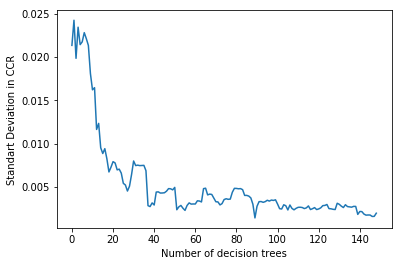

In [43]:
import matplotlib.pyplot as plt 
deneme = result2
fig = plt.figure()
y = standardev
x = range(0,149)
plt.plot(x,y)
plt.xlabel("Number of decision trees")
plt.ylabel("Standart Deviation in CCR")
